In [2]:
#importing necessary packages
from collections import defaultdict
import gzip
from Bio.Align import PairwiseAligner
import numpy as np
#import matplotlib.pyplot as plt
import Bio.Seq
import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns
import Bio.Seq
import Bio.SeqIO
from Bio.SeqRecord import SeqRecord
import os
import sys
from pathlib import Path


#new pacakge for hamming distance 
import Levenshtein as lv

Updating sensor analysis pipeline

Allow mismatches in protospacer AND barcode
Have this as in input into the df...(start with 1 mismatch and go from there)

In [2]:
import itertools

def hammingDist(str1, str2, fillchar = '-'):
    return sum([ch1 != ch2 for (ch1,ch2) in itertools.zip_longest(str1, str2, fillvalue = fillchar)])


In [3]:
library = pd.read_csv('be_cluster_scripts_BARCODE_COUNTS_2024_7_3/IDR_ABE_library_columns_renamed.csv')
library

,Hugo_Symbol,Chromosome,Start_Position,HGVSc,Variant_Index,Variant_Classification,Polyphen_Prediction,Base_Change,HGVSp_Short,Mut_PAM_Distance,...,t_depth,Annotation_Status,mutationInCis_Flag,num_tumors,Target_Sequence_50,scaffold_BC_add,Full_Seq,BC_pair,sensor_alt,gRNA_id
0,ABL1,9,133755997,ENST00000318560.5:c.1624A>G,2.0,Missense_Mutation,benign,A>G,p.R542G,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GCATCTCAGGCACGTCAGTGGTGTCTCCGTGCTCTGCAGCTC,sg_1
1,ABL1,9,133755997,ENST00000318560.5:c.1624A>G,1.0,Missense_Mutation,benign,A>G,p.R542G,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ATCTCAGGCACGTCAGTGGTGTCTCCGTGCTCTGCAGCTCTC,sg_2
2,ABL1,9,133760635,ENST00000318560.5:c.2958A>G,1.0,Silent,NaN,A>G,p.P986=,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GGTCCCCTGCCAGGGCCGAGGATGCTGACGGCAACGTGGAGG,sg_3
3,ABL2,1,179078007,ENST00000502732.1:c.2395A>G,1.0,Missense_Mutation,benign,T>C,p.M799V,-13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCTGGCAGTTCCTGGGAAGGGTCACTGCCATCCTATCCTGCT,sg_4
4,AFF1,4,88035564,ENST00000307808.6:c.1558A>G,1.0,Missense_Mutation,benign,A>G,p.T520A,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GCGCAGCTGGCTGGCTGACTTTGGCCAGCCAGTTGTCCAGCT,sg_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,controlsgRNA_95,13,88376208,NaN,-,NaN,NaN,C>T,-,15.0,...,NaN,NaN,NaN,NaN,TTGAGCTATTGTACAGGGCTGGGGCCATGGGAGACAGTGTTGGTGG...,GGGGCCATGGGAGACAGTGTGTTTAAGAGCTATGCTGGAAACAGCA...,CATAGCGTACACGTCTCACACCGGGGCCATGGGAGACAGTGTGTTT...,F1-R4,CCACAGCCACCAACACTGTCTCCCATAGCCCCAGCCCTGTAC,sg_1668
1668,controlsgRNA_96,X,36797961,NaN,-,NaN,NaN,A>G,-,15.0,...,NaN,NaN,NaN,NaN,CCTGGACTGGTTGCAACCTAGACCCATGCACCTTCTTCATTGGTCT...,GACCCATGCACCTTCTTCATGTTTAAGAGCTATGCTGGAAACAGCA...,CATAGCGTACACGTCTCACACCGACCCATGCACCTTCTTCATGTTT...,F1-R4,TAGGGGAGACCAATGAAGAAGGTGCACGGGTCTAGGTTGCAA,sg_1669
1669,controlsgRNA_97,10,57998002,NaN,-,NaN,NaN,C>T,-,15.0,...,NaN,NaN,NaN,NaN,GGTGTGGCATGACACTGTAGGAAGTCCTCAAAACTAATCAGGGCAG...,GAAGTCCTCAAAACTAATCAGTTTAAGAGCTATGCTGGAAACAGCA...,CATAGCGTACACGTCTCACACCGAAGTCCTCAAAACTAATCAGTTT...,F1-R4,TTTCCCCTGCCCTGATTAGTTTTGAGAACTTCCTACAGTGTC,sg_1670
1670,controlsgRNA_98,4,81701927,NaN,-,NaN,NaN,A>G,-,15.0,...,NaN,NaN,NaN,NaN,TATACAAAATATGTAATCCTGTGAGACATTATATATTGACTGGGTA...,GTGAGACATTATATATTGACGTTTAAGAGCTATGCTGGAAACAGCA...,CATAGCGTACACGTCTCACACCGTGAGACATTATATATTGACGTTT...,F1-R4,TCTGTCTACCCAGTCAATATATAATGCCTCACAGGATTACAT,sg_1671


In [16]:
protos = list(library['Protospacer'])

mat = np.zeros((len(protos), len(protos)))

count_off_diag=0
for i, val in enumerate(protos):
    for k, val2 in enumerate(protos):
        dist = hammingDist(val, val2, fillchar = '-')
        if dist<=2:
            mat[i][k]+=1
            if i!=k:
                count_off_diag +=1
                print(i)
                print(k)


379
380
380
379
1347
1642
1642
1347


In [30]:
import Levenshtein as lv

In [4]:
lv.hamming('ATCG', 'ATGG', score_cutoff=4)

1

In [33]:
protos = list(library['Protospacer'])

mat = np.zeros((len(protos), len(protos)))

count_off_diag=0
for i, val in enumerate(protos):
    for k, val2 in enumerate(protos):
        dist = lv.hamming(val, val2)
        if dist<=2:
            mat[i][k]+=1
            if i!=k:
                count_off_diag +=1
                print(i)
                print(k)

379
380
380
379
1347
1642
1642
1347


In [21]:
protos[379]==protos[380]

True

In [23]:
library.iloc[[379, 380]]

,Hugo_Symbol,Chromosome,Start_Position,HGVSc,Variant_Index,Variant_Classification,Polyphen_Prediction,Base_Change,HGVSp_Short,Mut_PAM_Distance,...,t_depth,Annotation_Status,mutationInCis_Flag,num_tumors,Target_Sequence_50,scaffold_BC_add,Full_Seq,BC_pair,sensor_alt,gRNA_id
379,DICER1,14,95562834,ENST00000343455.3:c.4423A>G,1.0,Missense_Mutation,benign,T>C,p.T1475A,-14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ATTTTCCATTCATATGCAGAATCAGCGGTTGAAAAAGGAGAA,sg_380
380,DICER1,14,95562837,ENST00000343455.3:c.4420A>G,1.0,Missense_Mutation,benign,T>C,p.T1474A,-17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ATTTTCCATTCATATGCAGAATCAGTGGCTGAAAAAGGAGAA,sg_381


In [20]:
protos[1642]

'GGAGTAGAGGAAGATGGTGA'

In [15]:
count_off_diag

4

In [4]:
hammingDist('ATCGA', 'ATGGA', fillchar = '-')

1

# Looking at unidentified protospacers

In [5]:
MIN_QUALITY = 30
GZ= False

#THIS FUNCTION MAY NEED TO BE UPDATED DEPENDING ON HOW THE DATA IS STRUCTURED
def fastq_reader(fname, gz=False):
    _open = gzip.open if gz else open
    proc_read = (lambda line: line.strip().decode()) if gz else (lambda line: line.strip())
    proc_qual = (lambda line: line.strip()) if gz else (lambda line: line.strip().encode('utf-8'))
    with _open(fname, 'r') as f:
        for i, line in enumerate(f):
            if i % 4 == 0:
                identifier = proc_read(line)
            elif i % 4 == 1:
                read = proc_read(line)
            elif i % 4 == 3:
                quality = proc_qual(line)
                yield identifier[-20:], read, quality #protospacer (index2), read, quality score


def quality_checker(q1, q2):
    """ 
    Checks quality score of the reads
    """

    qual1 = (np.frombuffer(q1, dtype=np.uint8) - 33).mean()
    qual2 = (np.frombuffer(q2, dtype=np.uint8) - 33).mean()

    low_qual = []

    if qual1 < MIN_QUALITY:
        low_qual.append('1')
    if qual2 < MIN_QUALITY:
        low_qual.append('2')
    
    if len(low_qual)==0:
        quality_out = 'good quality'
    else:
        quality_out = 'low_qual_r' + ''.join(low_qual)

    return quality_out


def extraction_filtration(input_df,R1_FILE,R2_FILE, breakpoint=False):

    """
    Takes in reads and returns dataframe containing pegRNA counts AND sensor outcomes.

    Also returns summary of outcomes including:
    - low quality (and which of the reads are low quality (or if all are low quality))
    - no extension match
    - no protospacer match
    - decoupled extension-protospacer
    - correct identification
    """

    #also an array of the extension sequences
    #ext_sequences = np.array(list(input_df['PBS_RTT_5to3']))
    #sensor_handles = np.unique(input_df['sensor_handle'])

    #lists and dicts for matching up reads
    proto_list = [i[1:] for i in input_df['Protospacer']]
    bc_list = [str(Bio.Seq.Seq(i).reverse_complement()) for i in input_df['Hamming_BC']]

    proto_bc_dict = dict(zip(bc_list, proto_list))
    confusion_mat = np.zeros((len(proto_list), len(bc_list)))

    
    #------initialize a dataframe for holding the pegRNA counts and sensor outcomes
    d1 = pd.DataFrame(dict(zip(['Guide_ID', 'sgRNA_no_Gstart', 'unique_BC'], [list(input_df['gRNA_id']), proto_list, bc_list])))

    cols = ['guide_count', 'matched_sensor_count', 'bc_count']
    z = np.zeros((len(cols), len(input_df)))
    d2 = pd.DataFrame(dict(zip(cols, z)))
    df1 = pd.concat((d1, d2), axis=1).set_index('Guide_ID')

    #and annotating the duplicate guides
    i, v = np.unique(d1['sgRNA_no_Gstart'], return_counts=True)

    duplicate_dict = dict(zip(i, v>1))
    df1['duplicate_sgRNA'] = [duplicate_dict[i] for i in df1['sgRNA_no_Gstart']]
    df1[df1['duplicate_sgRNA']==True]

    #------initialize a dataframe for holding metadata about the identification of sensors
    outcomes = ['good quality', 'low_qual_r1', 'low_qual_r2', 'low_qual_r12', 
                'proto_identified',
                'bc_identified',
                'no_match_proto',
                'no_match_bc',
                'mismatch',
                'correct_match'
                ]
    
    outcomes_count = np.zeros(len(outcomes))
    class_df = pd.DataFrame(dict(zip(['classification', 'count'],[outcomes, outcomes_count]))).set_index('classification')


    mismatch_holder = [[] for i in range(len(bc_list))]

    sensor_perfect = []
    sensor_mismatch = []
    
    #iterating through the reads...
    for i, ((proto1, r1, q1), (proto2, r2, q2)) in enumerate(zip(fastq_reader(R1_FILE, gz=GZ), fastq_reader(R2_FILE, gz=GZ)), 1):
        #r1 = sensor read
        #r2 = extension read
        #proto1/2 = protospacer read (index2)

        #first check the quality
        quality_out = quality_checker(q1,q2)
        class_df.loc[quality_out, 'count']+=1

        #if quality only good for r2, use it to identify the protospacer
        if quality_out == 'low_qual_r1':
            proto = r2[:20]
            
            #not including these in the metadata count...
            #just the guide count (separate thing)
            if proto in proto_list:
                df1.loc[df1['sgRNA_no_Gstart']==proto, 'guide_count']+=1
                
            else:
                continue
            
        elif quality_out=='good quality':
            proto = r2[:20]
            bc = r1[:15]

            if proto in proto_list:
                #guide counts
                df1.loc[df1['sgRNA_no_Gstart']==proto, 'guide_count']+=1
                class_df.loc['proto_identified', 'count']+=1

            elif proto not in proto_list:
                class_df.loc['no_match_proto', 'count']+=1

            if bc in bc_list:
                df1.loc[df1['unique_BC']==bc, 'bc_count']+=1
                class_df.loc['bc_identified', 'count']+=1

                if proto not in proto_list:
                    bc_idx = bc_list.index(bc)
                    mismatch_holder[bc_idx].append(proto)


            elif bc not in bc_list:
                class_df.loc['no_match_bc', 'count']+=1


            if proto in proto_list:

                if bc in bc_list:
                    bc_idx = bc_list.index(bc)
                    proto_match = proto_bc_dict[bc]
                    
                    if proto == proto_match:
                        #correct_match+=1
                        class_df.loc['correct_match', 'count']+=1

                        #and add in the matched_sensor_count
                        df1.loc[df1['unique_BC']==bc, 'matched_sensor_count']+=1

                        #and annotate the confusion matrix
                        confusion_mat[bc_idx][bc_idx]+=1


                    else:
                        #mismatch+=1
                        class_df.loc['mismatch', 'count']+=1

                        proto_idx = proto_list.index(proto)
                        confusion_mat[proto_idx][bc_idx]+=1

            else:
                continue

        if breakpoint != False:
            if i>breakpoint:
                break

    
    #and then prune the duplicates...
    #both the files and the counts table...

   
    return df1, class_df, confusion_mat, mismatch_holder, sensor_perfect, sensor_mismatch

In [6]:
def extraction_filtration_new(input_df,R1_FILE,R2_FILE, proto_mismatches_allowed = 2, breakpoint=False):

    """
    Takes in reads and returns dataframe containing pegRNA counts AND sensor outcomes.

    Also returns summary of outcomes including:
    - low quality (and which of the reads are low quality (or if all are low quality))
    - no extension match
    - no protospacer match
    - decoupled extension-protospacer
    - correct identification
    """

    #also an array of the extension sequences
    #ext_sequences = np.array(list(input_df['PBS_RTT_5to3']))
    #sensor_handles = np.unique(input_df['sensor_handle'])

    #lists and dicts for matching up reads
    proto_list = [i[1:] for i in input_df['Protospacer']]
    bc_list = [str(Bio.Seq.Seq(i).reverse_complement()) for i in input_df['Hamming_BC']]

    proto_bc_dict = dict(zip(bc_list, proto_list))
    confusion_mat = np.zeros((len(proto_list), len(bc_list)))

    
    #------initialize a dataframe for holding the pegRNA counts and sensor outcomes
    d1 = pd.DataFrame(dict(zip(['Guide_ID', 'sgRNA_no_Gstart', 'unique_BC'], [list(input_df['gRNA_id']), proto_list, bc_list])))

    cols = ['total_guide_count', 'matched_guide_count', 'bc_count']
    z = np.zeros((len(cols), len(input_df)))
    d2 = pd.DataFrame(dict(zip(cols, z)))
    df1 = pd.concat((d1, d2), axis=1).set_index('Guide_ID')

    #and annotating the duplicate guides
    i, v = np.unique(d1['sgRNA_no_Gstart'], return_counts=True)

    duplicate_dict = dict(zip(i, v>1))
    df1['duplicate_sgRNA'] = [duplicate_dict[i] for i in df1['sgRNA_no_Gstart']]
    df1[df1['duplicate_sgRNA']==True]

    #------initialize a dataframe for holding metadata about the identification of sensors
    outcomes = ['good quality', 'low_qual_r1', 'low_qual_r2', 'low_qual_r12', 
                'no_match_bc',
                'bc_identified',
                'proto_identified_perfect',
                'proto_identified_imperfect',
                'proto_identified_recombined',
                'no_match_proto',
                ]
    
    outcomes_count = np.zeros(len(outcomes))
    class_df = pd.DataFrame(dict(zip(['classification', 'count'],[outcomes, outcomes_count]))).set_index('classification')


    mismatch_holder = [[] for i in range(len(bc_list))]

    sensor_perfect = []
    sensor_mismatch = []
    
    #iterating through the reads...
    for i, ((proto1, r1, q1), (proto2, r2, q2)) in enumerate(zip(fastq_reader(R1_FILE, gz=GZ), fastq_reader(R2_FILE, gz=GZ)), 1):
        #r1 = sensor read
        #r2 = extension read
        #proto1/2 = protospacer read (index2)

        #first check the quality
        quality_out = quality_checker(q1,q2)
        class_df.loc[quality_out, 'count']+=1
            
        if quality_out=='good quality':
            proto = r2[:20]
            bc = r1[:15]


            if bc in bc_list:
                df1.loc[df1['unique_BC']==bc, 'bc_count']+=1
                class_df.loc['bc_identified', 'count']+=1

                bc_idx = bc_list.index(bc)
                proto_match = proto_bc_dict[bc]

                hamming_distance = lv.hamming(proto, proto_match)

                if hamming_distance==0:
                    df1.loc[df1['unique_BC']==bc, 'matched_guide_count']+=1
                    df1.loc[df1['unique_BC']==bc,  'total_guide_count']+=1
                    class_df.loc['proto_identified_perfect', 'count']+=1

                elif hamming_distance<=proto_mismatches_allowed:
                    df1.loc[df1['unique_BC']==bc, 'matched_guide_count']+=1
                    df1.loc[df1['unique_BC']==bc,  'total_guide_count']+=1
                    class_df.loc['proto_identified_imperfect', 'count']+=1

                elif hamming_distance>proto_mismatches_allowed:

                    if proto in proto_list:
                        df1.loc[df1['sgRNA_no_Gstart']==proto, 'total_guide_count']+=1
                        class_df.loc['proto_identified_recombined', 'count']+=1

                        proto_idx = proto_list.index(proto)
                        confusion_mat[proto_idx][bc_idx]+=1

                    else:
                        #and look for imperfect matches
                        count=0
                        for k in proto_list:
                            count+=1
                            h_dist = lv.hamming(k, proto)
                            if h_dist <=proto_mismatches_allowed:
                                df1.loc[df1['sgRNA_no_Gstart']==k, 'total_guide_count']+=1
                                class_df.loc['proto_identified_recombined', 'count']+=1

                                proto_idx = proto_list.index(k)
                                confusion_mat[proto_idx][bc_idx]+=1
                                break
                        
                        if count==len(proto_list):
                            class_df.loc['no_match_proto', 'count']+=1



            elif bc not in bc_list:
                class_df.loc['no_match_bc', 'count']+=1


            else:
                continue

        if breakpoint != False:
            if i>breakpoint:
                break

    
    #and then prune the duplicates...
    #both the files and the counts table...

   
    return df1, class_df, confusion_mat, mismatch_holder, sensor_perfect, sensor_mismatch

In [7]:
R1_FILE = '/Volumes/sanchezrivera/samgould/240624San/D24-10888-6775T/240624San_D24-10888_1_sequence.fastq'
R2_FILE = '/Volumes/sanchezrivera/samgould/240624San/D24-10888-6775T/240624San_D24-10888_2_sequence.fastq'

input_df = pd.read_csv('be_cluster_scripts_BARCODE_COUNTS_2024_7_3/IDR_ABE_library_columns_renamed.csv')

In [18]:
df1, class_df, confusion_mat, mismatch_holder, sensor_perfect, sensor_mismatch = extraction_filtration_new(input_df,R1_FILE,R2_FILE, proto_mismatches_allowed = 2, breakpoint=10000)

In [19]:
class_df

,count
classification,
good quality,9872.0
low_qual_r1,15.0
low_qual_r2,89.0
low_qual_r12,25.0
no_match_bc,388.0
bc_identified,9484.0
proto_identified_perfect,5097.0
proto_identified_imperfect,2467.0
proto_identified_recombined,1097.0


In [20]:
print(f'total_guide_count: {sum(df1["total_guide_count"])} | matched_guide_count: {sum(df1["matched_guide_count"])} | bc_count: {sum(df1["bc_count"])}')

total_guide_count: 8662.0 | matched_guide_count: 7564.0 | bc_count: 9484.0


In [11]:
df1

,sgRNA_no_Gstart,unique_BC,total_guide_count,matched_guide_count,bc_count,duplicate_sgRNA
Guide_ID,,,,,,
sg_1,CACAGAGACACCACTGACG,AAAGGTCCATTCTGA,8.0,8.0,10.0,False
sg_2,AGCACAGAGACACCACTGA,CAAGGTTTCGCTTGT,7.0,6.0,8.0,False
sg_3,CCATCAGCATCCTCGGCCC,CAATTAGCGTTGTGA,10.0,9.0,9.0,False
sg_4,ATGGCAATGACCCTTCCCA,CGTGCCAAACGTGGC,10.0,8.0,8.0,False
sg_5,TGGCTGACCAAAGTCAGCC,ACAATGGCATACAAA,7.0,7.0,7.0,False
...,...,...,...,...,...,...
sg_1668,GGGCCATGGGAGACAGTGT,GGCGAAGGAGTTGTC,0.0,0.0,0.0,False
sg_1669,ACCCATGCACCTTCTTCAT,GGCACCTCCACAGGA,3.0,3.0,3.0,False
sg_1670,AAGTCCTCAAAACTAATCA,CTCAGTTCATCCGAA,0.0,0.0,0.0,False


In [171]:
import scipy.stats

scipy.stats.pearsonr(df1['matched_guide_count'], df1['bc_count'])

PearsonRResult(statistic=0.9876731308507102, pvalue=0.0)

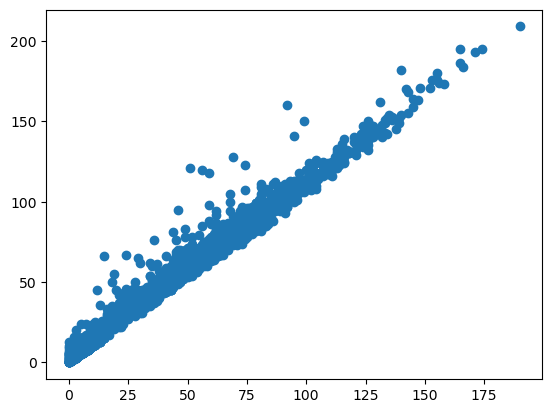

In [174]:
plt.scatter(df1['matched_guide_count'], df1['bc_count'])

In [167]:
df1

,sgRNA_no_Gstart,unique_BC,total_guide_count,matched_guide_count,bc_count,duplicate_sgRNA
Guide_ID,,,,,,
sg_1,CACAGAGACACCACTGACG,AAAGGTCCATTCTGA,60.0,57.0,75.0,False
sg_2,AGCACAGAGACACCACTGA,CAAGGTTTCGCTTGT,52.0,47.0,60.0,False
sg_3,CCATCAGCATCCTCGGCCC,CAATTAGCGTTGTGA,65.0,61.0,68.0,False
sg_4,ATGGCAATGACCCTTCCCA,CGTGCCAAACGTGGC,78.0,59.0,76.0,False
sg_5,TGGCTGACCAAAGTCAGCC,ACAATGGCATACAAA,70.0,59.0,63.0,False
...,...,...,...,...,...,...
sg_1668,GGGCCATGGGAGACAGTGT,GGCGAAGGAGTTGTC,1.0,1.0,1.0,False
sg_1669,ACCCATGCACCTTCTTCAT,GGCACCTCCACAGGA,11.0,11.0,11.0,False
sg_1670,AAGTCCTCAAAACTAATCA,CTCAGTTCATCCGAA,9.0,9.0,9.0,False


In [112]:
m1 = [len(i) for i in mismatch_holder]
np.argmax(m1)

754

In [117]:
df1[df1['duplicate_sgRNA']==True]

,sgRNA_no_Gstart,unique_BC,guide_count,matched_sensor_count,bc_count,duplicate_sgRNA
Guide_ID,,,,,,
sg_380,CAACCACTGATTCTGCATA,GGAAGCTCTGTTGCA,126.0,57.0,60.0,True
sg_381,CAACCACTGATTCTGCATA,GTAATGGTGGTTACT,126.0,54.0,64.0,True


In [113]:
df1.iloc[754]

sgRNA_no_Gstart         CTGGTAATAACACCAGTAC
unique_BC                   GAACGAGAGGTCCGT
guide_count                             9.0
matched_sensor_count                    8.0
bc_count                              186.0
duplicate_sgRNA                       False
Name: sg_755, dtype: object

In [35]:
np.unique(mismatch_holder[3], return_counts=True)



(array(['AAGGCGGTGACCCTTCCCA', 'ATGGAGGTGACCCTTCCCA',
        'ATGGCGATGACCCTTCCCA', 'ATGGCGGTGACCCTTCCCA'], dtype='<U19'),
 array([1, 1, 4, 1]))

In [34]:
from Bio.Align import PairwiseAligner

#--- GLOBAL VARIABLES ---------
MATCH_SCORE = 1
MISMATCH_SCORE = -0.5
OPEN_GAP_SCORE = -5
EXTEND_GAP_SCORE = -0.1
TARGET_END_GAP_SCORE = 0
QUERY_END_GAP_SCORE = 0

def make_aligner():
    """ 
    Aligner function from Bio.Align.PairwiseAligner with custom parameters.
    """
    aligner = PairwiseAligner()
    aligner.mode = 'global'
    aligner.match_score = MATCH_SCORE
    aligner.mismatch_score = MISMATCH_SCORE
    aligner.open_gap_score = OPEN_GAP_SCORE
    aligner.extend_gap_score = EXTEND_GAP_SCORE
    aligner.target_end_gap_score = TARGET_END_GAP_SCORE
    aligner.query_end_gap_score = QUERY_END_GAP_SCORE
    return aligner

aligner = make_aligner()



In [36]:
input_df['Protospacer'][3][1:]

'ATGGCAATGACCCTTCCCA'

In [38]:
wt = input_df['Protospacer'][3][1:]
alt = 'ATGGCGATGACCCTTCCCA'
alignments = aligner.align(wt, alt)
print(alignments[0])

ATGGCAATGACCCTTCCCA
|||||.|||||||||||||
ATGGCGATGACCCTTCCCA



In [53]:

def mismatch_checker(wt, alt):
    locs = []
    mismatch_type = []
    num_mismatched = []
    count = 0
    for k, val in enumerate(wt):
        if val!=alt[k]:
            mismatch_type.append(f'{val}>{alt[k]}')
            locs.append(k+1)
            count+=1


    return locs, mismatch_type, count



In [62]:
mismatch_holder[0]

['CACGGAGACACCACTGACG',
 'CACGGACGGGGACGCCACT',
 'CACGGAGACACCACTGACG',
 'CACGGGGACACCACTGACG',
 'CACGGAGACACCACTGACG',
 'CACGGGGACACCACTGACG']

In [64]:
input_df['Protospacer'][0][1:]

'CACAGAGACACCACTGACG'

In [70]:
wt = input_df['Protospacer'][0][1:]
alt =mismatch_holder[0][4]
alignments = aligner.align(wt, alt)
print(alignments[0])

CACAGAGACACCACTGACG
|||.|||||||||||||||
CACGGAGACACCACTGACG



In [77]:
loc_holder = []
mismatch_type_holder = []
num_mis = []
for i, val in input_df.iterrows():

    proto = val['Protospacer'][1:]
    
    for k in mismatch_holder[i]:
        locs, mismatch_type, num_mismatched = mismatch_checker(proto, k)
        num_mis.append(num_mismatched)

        #print(mismatch_type)
        for k in locs:
            loc_holder.append(k)

        for j in mismatch_type:
            mismatch_type_holder.append(j)
    

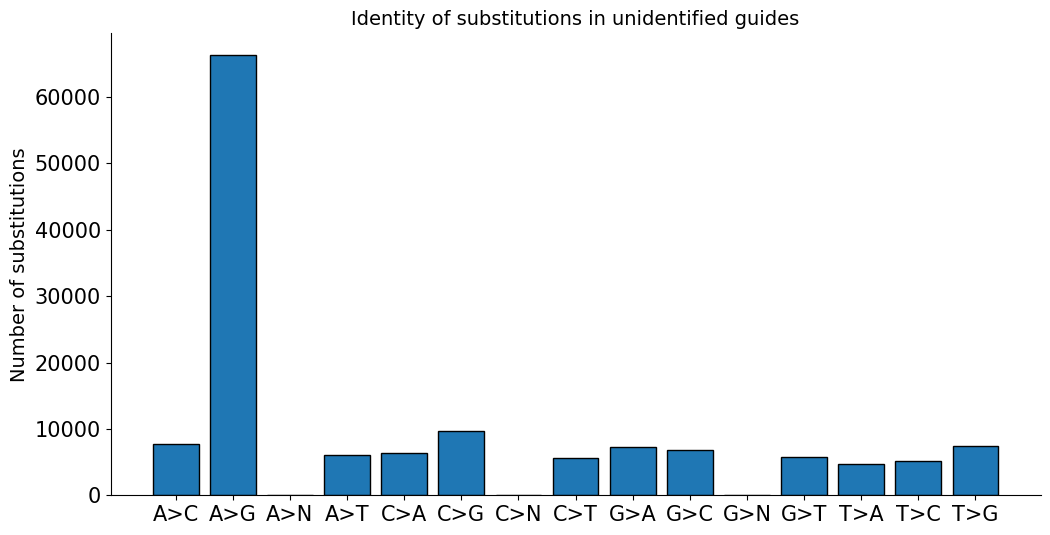

In [91]:
u, c  = np.unique(mismatch_type_holder, return_counts=True)

fig, ax = plt.subplots(figsize=(12,6))
ax.bar(u,c, edgecolor='black', linewidth=1)

# We change the fontsize of minor ticks label 
ax.tick_params(axis='both', which='major', labelsize=15)

ax.set_ylabel("Number of substitutions", fontsize=14)
ax.set_xlabel("")

ax.set_title(f"Identity of substitutions in unidentified guides", fontsize=14)

ax.spines[['top','right']].set_visible(False)


#pd.DataFrame(dict(zip(u, c)))

[Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(6, 0, '7'),
 Text(7, 0, '8'),
 Text(8, 0, '9'),
 Text(9, 0, '10'),
 Text(10, 0, '11'),
 Text(11, 0, '12'),
 Text(12, 0, '13'),
 Text(13, 0, '14'),
 Text(14, 0, '15'),
 Text(15, 0, '16'),
 Text(16, 0, '17'),
 Text(17, 0, '18'),
 Text(18, 0, '19'),
 Text(19, 0, '20')]

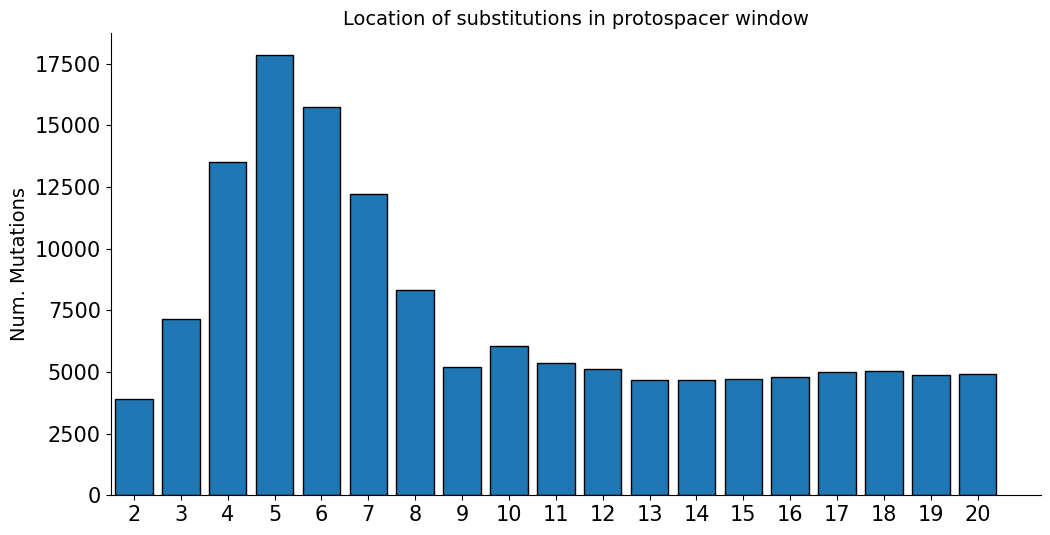

In [99]:
u, c  = np.unique(loc_holder, return_counts=True)

fig, ax = plt.subplots(figsize=(12,6))
ax.bar(u,c, edgecolor='black', linewidth=1)

# We change the fontsize of minor ticks label 
ax.tick_params(axis='both', which='major', labelsize=15)

ax.set_ylabel("Num. Mutations", fontsize=14)
ax.set_xlabel("")

ax.set_title(f"Location of substitutions in protospacer window", fontsize=14)
ax.set_xlim(.5,)
ax.spines[['top','right']].set_visible(False)

ax.set_xticks(list(range(1,20)))
ax.set_xticklabels(list(range(2,21)))

In [73]:
np.unique(num_mis, return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19]),
 array([1487,  980,  402,  149,   50,   18,   12,   13,    9,   24,   45,
          63,   75,  118,  117,   64,   51,   14,    2]))

In [102]:
len(loc_holder)

139105

In [106]:
combo = pd.DataFrame(dict(zip(['identity', 'location'], [mismatch_type_holder, loc_holder])))

ideal = combo[(combo['location']<=8) & (combo['location']>=4)]

np.unique(ideal['identity'], return_counts=True)

(array(['A>C', 'A>G', 'A>T', 'C>A', 'C>G', 'C>N', 'C>T', 'G>A', 'G>C',
        'G>T', 'T>A', 'T>C', 'T>G'], dtype=object),
 array([ 2203, 42330,  1801,   946,  2947,     1,  1468,  1042,  1204,
         1134,   832,  1125,  2294]))

In [75]:
np.unique(loc_holder, return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19]),
 array([ 406,  745, 1379, 1749, 1533, 1216,  837,  512,  628,  545,  530,
         465,  456,  462,  476,  500,  513,  477,  501]))

# making the function for .py

In [ ]:
def to_IOSeq_rec(sensor_seq, i, q1, bc_len, sensor_len):
    """ 
    Modified to only extract 42 nt sensor
    After 15 nt barcode
    """
    qname = 'read_' + str(i)
    record = SeqRecord(Bio.Seq.Seq(sensor_seq[bc_len:bc_len+sensor_len]), id=qname, name=qname, description='', dbxrefs=[])

    #add quality score to the record
    qual = (np.frombuffer(q1, dtype=np.uint8) - 33)
    record.letter_annotations["phred_quality"] = qual[bc_len:bc_len+sensor_len]
    
    return record


def extraction_filtration(folder_name, input_df,R1_FILE,R2_FILE, bc_len, sensor_len, splitby, proto_mismatches_allowed, breakpoint=False):

    """
    Takes in reads and returns dataframe containing pegRNA counts AND sensor outcomes.

    Also returns summary of outcomes including:
    - low quality (and which of the reads are low quality (or if all are low quality))
    - no extension match
    - no protospacer match
    - decoupled extension-protospacer
    - correct identification
    """

    #----------1. generate folders for holding split sensor reads---------------
    os.mkdir(folder_name)#make the new directory (needs to be a non-existent folder)

    #write empty fastq files to a new folder for EACH gRNA
    #need to modify based on where the guide_ID column is/what its name is
    for i in list(input_df['gRNA_id']):
        f_name = i + '.fastq'
        with open(folder_name + '/' + f_name, 'w') as fp:
            pass

    #----------------lists and dicts for matching up reads------------------------
    proto_list = [i[1:] for i in input_df['Protospacer']]
    bc_list = [str(Bio.Seq.Seq(i).reverse_complement()) for i in input_df['Hamming_BC']]

    proto_bc_dict = dict(zip(bc_list, proto_list))
    confusion_mat = np.zeros((len(proto_list), len(bc_list)))

    
    #------initialize a dataframe for holding the pegRNA counts and sensor outcomes
    d1 = pd.DataFrame(dict(zip(['Guide_ID', 'sgRNA_no_Gstart', 'unique_BC'], [list(input_df['gRNA_id']), proto_list, bc_list])))

    cols = ['total_guide_count', 'matched_guide_count', 'bc_count']
    z = np.zeros((len(cols), len(input_df)))
    d2 = pd.DataFrame(dict(zip(cols, z)))
    df1 = pd.concat((d1, d2), axis=1).set_index('Guide_ID')

    #and annotating the duplicate guides
    i, v = np.unique(d1['sgRNA_no_Gstart'], return_counts=True)

    duplicate_dict = dict(zip(i, v>1))
    df1['duplicate_sgRNA'] = [duplicate_dict[i] for i in df1['sgRNA_no_Gstart']]
    df1[df1['duplicate_sgRNA']==True]

    #------initialize a dataframe for holding metadata about the identification of sensors
    outcomes = ['good quality', 'low_qual_r1', 'low_qual_r2', 'low_qual_r12', 
                'no_match_bc',
                'bc_identified',
                'proto_identified_perfect',
                'proto_identified_imperfect',
                'proto_identified_recombined',
                'no_match_proto',
                ]
    
    outcomes_count = np.zeros(len(outcomes))
    class_df = pd.DataFrame(dict(zip(['classification', 'count'],[outcomes, outcomes_count]))).set_index('classification')
    

    #----------iterating through the reads...--------------
    for i, ((proto1, r1, q1), (proto2, r2, q2)) in enumerate(zip(fastq_reader(R1_FILE, gz=GZ), fastq_reader(R2_FILE, gz=GZ)), 1):
        #r1 = sensor read
        #r2 = extension read
        #proto1/2 = protospacer read (index2)

        #first check the quality
        quality_out = quality_checker(q1,q2)
        class_df.loc[quality_out, 'count']+=1
            
        if quality_out=='good quality':
            proto = r2[:20]
            bc = r1[:bc_len]


            if bc in bc_list:
                df1.loc[df1['unique_BC']==bc, 'bc_count']+=1
                class_df.loc['bc_identified', 'count']+=1

                bc_idx = bc_list.index(bc)
                proto_match = proto_bc_dict[bc]

                hamming_distance = lv.hamming(proto, proto_match)

                #perfect protospacer match
                if hamming_distance==0:
                    df1.loc[df1['unique_BC']==bc, 'matched_guide_count']+=1
                    df1.loc[df1['unique_BC']==bc,  'total_guide_count']+=1
                    class_df.loc['proto_identified_perfect', 'count']+=1

                    if splitby != 'barcode':
                        #-----CODE FOR PUTTING THINGS IN SEPARATE FASTQ FILE HERE------
                        #add the sensor read to the appropriate fastq file (numbered according to the pegRNA index)
                        guide_id = df1[df1['unique_BC']==bc].index[0]

                        out_file = folder_name + '/' +  guide_id + '.fastq'

                        record = to_IOSeq_rec(r1, i, q1, bc_len, sensor_len)

                        with open(out_file, 'a') as fq:
                            #and write it to the appropriate file
                            Bio.SeqIO.write(record, fq, 'fastq')

                #imperfect match within allowed hamming distance
                elif hamming_distance<=proto_mismatches_allowed:
                    df1.loc[df1['unique_BC']==bc, 'matched_guide_count']+=1
                    df1.loc[df1['unique_BC']==bc,  'total_guide_count']+=1
                    class_df.loc['proto_identified_imperfect', 'count']+=1

                    if splitby != 'barcode':
                        #-----CODE FOR PUTTING THINGS IN SEPARATE FASTQ FILE HERE------
                        #add the sensor read to the appropriate fastq file (numbered according to the pegRNA index)
                        guide_id = df1[df1['unique_BC']==bc].index[0]

                        out_file = folder_name + '/' +  guide_id + '.fastq'

                        record = to_IOSeq_rec(r1, i, q1, bc_len, sensor_len)

                        with open(out_file, 'a') as fq:
                            #and write it to the appropriate file
                            Bio.SeqIO.write(record, fq, 'fastq')

                #nonmatching (beyond allowed hamming distance)
                elif hamming_distance>proto_mismatches_allowed:

                    if proto in proto_list:
                        df1.loc[df1['sgRNA_no_Gstart']==proto, 'total_guide_count']+=1
                        class_df.loc['proto_identified_recombined', 'count']+=1

                        proto_idx = proto_list.index(proto)
                        confusion_mat[proto_idx][bc_idx]+=1

                    else:
                        #and look for imperfect matches
                        count=0
                        for k in proto_list:
                            count+=1
                            h_dist = lv.hamming(k, proto)
                            if h_dist <=proto_mismatches_allowed:
                                df1.loc[df1['sgRNA_no_Gstart']==k, 'total_guide_count']+=1
                                class_df.loc['proto_identified_recombined', 'count']+=1

                                proto_idx = proto_list.index(k)
                                confusion_mat[proto_idx][bc_idx]+=1
                                break
                        
                        if count==len(proto_list):
                            class_df.loc['no_match_proto', 'count']+=1


                #-------if splitting sensors into different fastq files ONLY by barcode sequence-----
                if splitby=='barcode':
                        #-----CODE FOR PUTTING THINGS IN SEPARATE FASTQ FILE HERE------
                        #add the sensor read to the appropriate fastq file (numbered according to the pegRNA index)
                        guide_id = df1[df1['unique_BC']==bc].index[0]

                        out_file = folder_name + '/' +  guide_id + '.fastq'

                        record = to_IOSeq_rec(r1, i, q1, bc_len, sensor_len)

                        with open(out_file, 'a') as fq:
                            #and write it to the appropriate file
                            Bio.SeqIO.write(record, fq, 'fastq')

            elif bc not in bc_list:
                class_df.loc['no_match_bc', 'count']+=1


            else:
                continue

        if breakpoint != False:
            if i>breakpoint:
                break

    
    #and then prune the duplicates...
    #both the files and the counts table...

   
    return df1, class_df, confusion_mat

# Making config file

In [15]:
config_df = pd.read_csv('be_cluster_scripts_BARCODE_COUNTS_2024_7_3/sensor_extraction_fastq_split_config_DIEGO_IDR_v3_barcode.txt', sep=' ')
#config_df['folder_name'] = [f'{i}_BARCODE_SPLIT_RERUN' for i in list(config_df['folder_name'])]
config_df['folder_name'] = [f'{i.split("_")[0]}_MISMATCH_PIPELINE' for i in list(config_df['folder_name'])]

In [17]:
#config_df.to_csv('DIEGO_IDR_CONFIG_MISMATCH_PIPELINE.txt', index=False, sep = ' ')